In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('/Users/boss/Downloads/supermarket_sales - Sheet1.csv')
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [45]:
df.describe()

,unit_price,quantity,tax,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [49]:
df.rename(columns={"tax_5%":"tax"}, inplace=True)
df.columns = [x.lower() for x in df.columns]
df.columns = [x.replace(' ', '_') for x in df.columns]

city
Naypyitaw    5265.1765
Yangon       5057.1605
Mandalay     5057.0320
Name: gross_income, dtype: float64


<AxesSubplot:ylabel='city'>

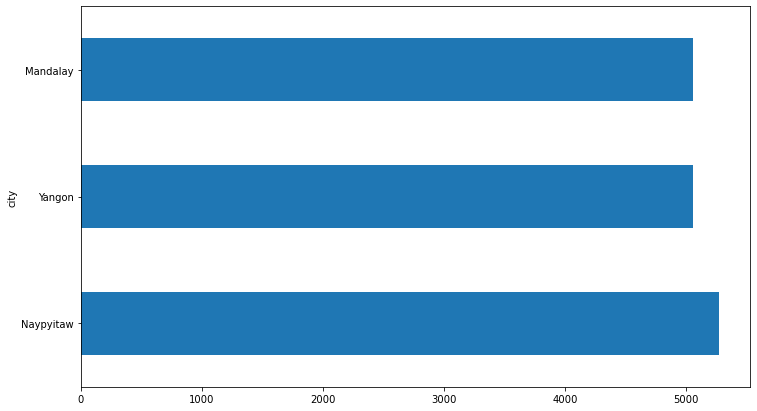

In [62]:
# Cities with greatest gross income 

gross_income_city = df.gross_income.groupby(by=df.city).sum().sort_values(ascending=False)
print(gross_income_city)
plt.figure(figsize=(12,7))
gross_income_city.plot(kind='barh')

city
Naypyitaw    105303.53
Yangon       101143.21
Mandalay     101140.64
Name: cogs, dtype: float64


<AxesSubplot:ylabel='city'>

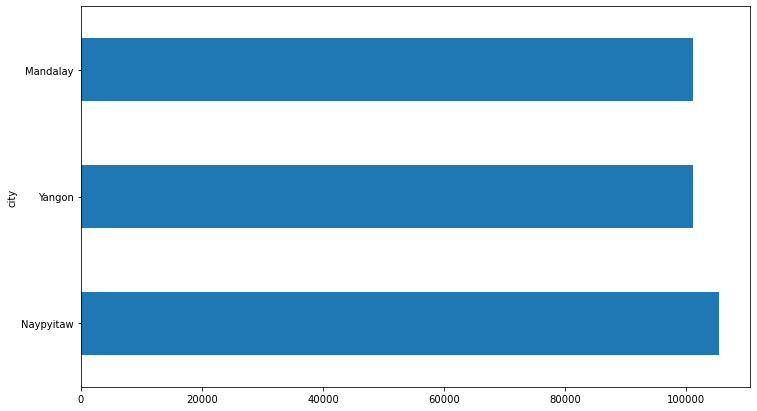

In [64]:
# Cities with greatest gross income 

cogs_city = df.cogs.groupby(by=df.city).sum().sort_values(ascending=False)
print(cogs_city)
plt.figure(figsize=(12,7))
cogs_city.plot(kind='barh')

<AxesSubplot:xlabel='product_line', ylabel='count'>

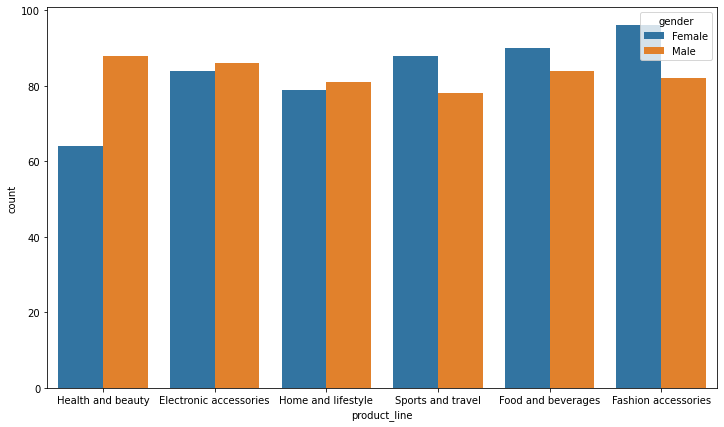

In [66]:
# Product sales above gender 

plt.figure(figsize=(12,7))
sns.countplot(x=df.product_line, hue=df.gender)

<AxesSubplot:xlabel='city', ylabel='unit_price'>

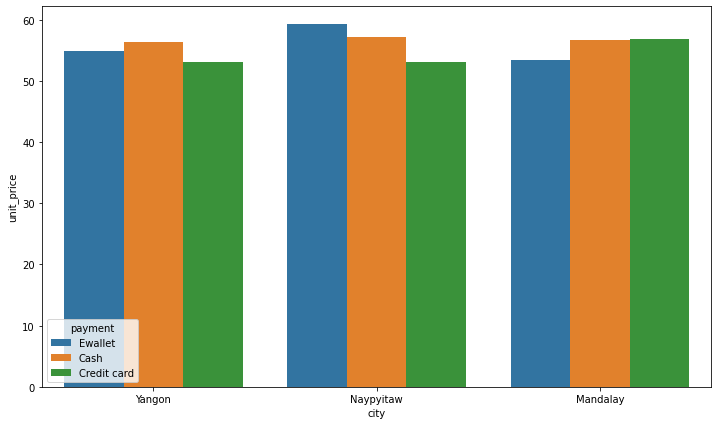

In [70]:
# Which payment method is the most widespreaded in cities

plt.figure(figsize=(12,7))
sns.barplot(x = 'city', y = 'unit_price', data = df, hue = 'payment',ci=0)

<AxesSubplot:xlabel='cogs', ylabel='product_line'>

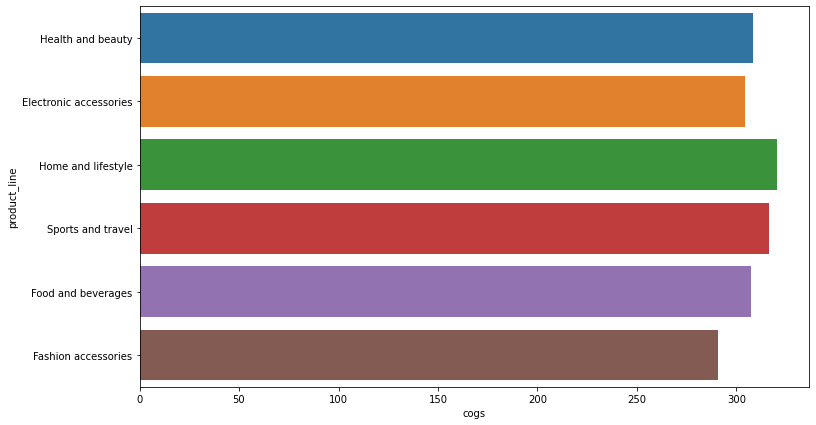

In [72]:
# Which products provide higher Cost of Good Sold (COGS)

plt.figure(figsize=(12,7))
sns.barplot(x = 'cogs', y = 'product_line', data = df,ci=0)

<AxesSubplot:xlabel='gross_income', ylabel='rating'>

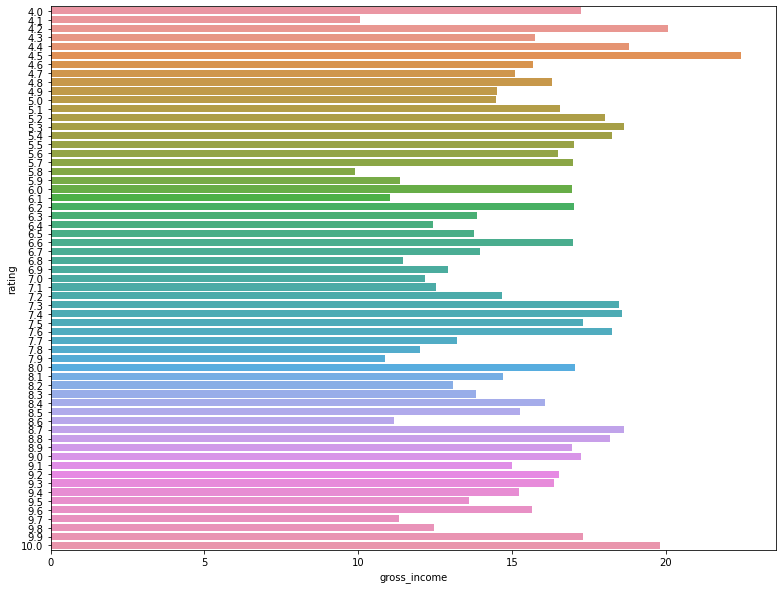

In [111]:
# Rating affect on gross income

plt.figure(figsize=(13,10))
sns.barplot(x = 'gross_income', y = 'rating', data = df,ci=0,orient = 'h')

<AxesSubplot:>

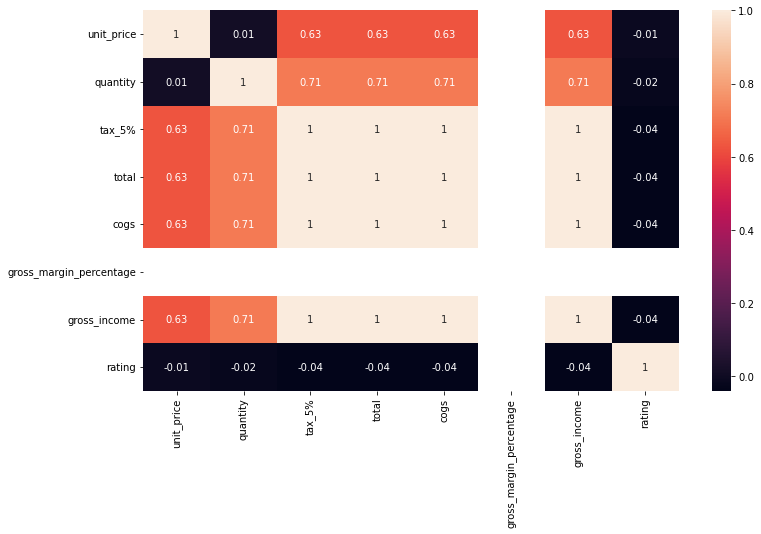

In [109]:
# Correlation between factors

np.round(df.corr(),2)
plt.figure(figsize=(12,7))
sns.heatmap(np.round(df.corr(),2),annot = True)

Text(0.5, 1.0, 'Which Branch is the most busy?')

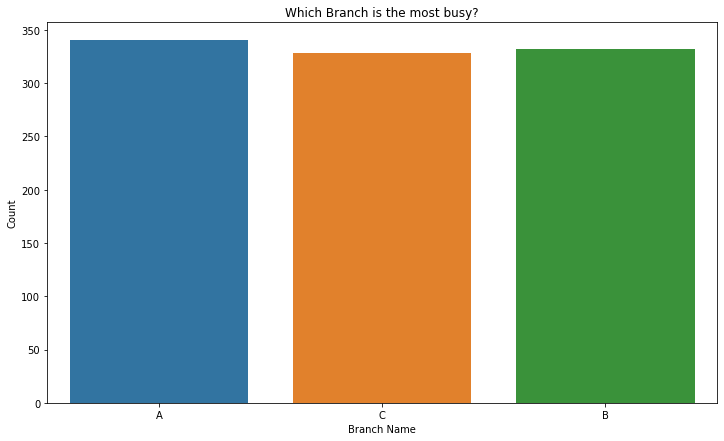

In [101]:
# Bussiest branch

plt.figure(figsize=(12,7))
sns.countplot(x=df['branch'], orient='h')
plt.xlabel('Branch Name')
plt.ylabel('Count')
plt.title('Which Branch is the most busy?')

Text(3.674999999999997, 0.5, 'Unit Price')

<Figure size 864x504 with 0 Axes>

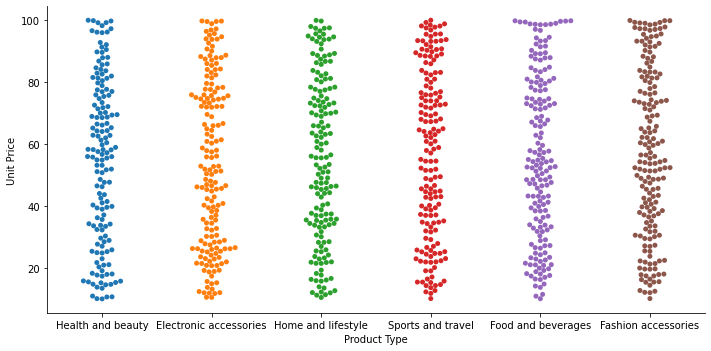

In [112]:
# What are most buyed products on each quantity 

plt.figure(figsize=(12,7))
sns.catplot(x='product_line',y='unit_price',kind='swarm',data=df,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')

<AxesSubplot:xlabel='count', ylabel='product_line'>

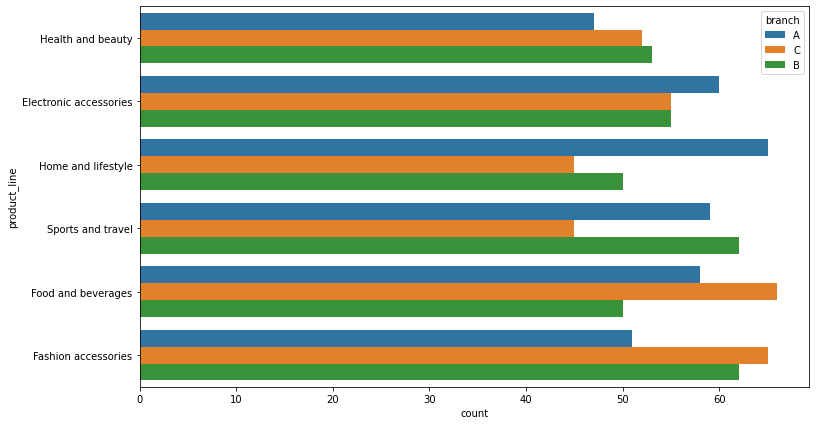

In [104]:
# What are most buyed products at each branch

plt.figure(figsize=(12,7)
sns.countplot(y ='product_line', hue = "branch", data = df) 

<AxesSubplot:xlabel='count', ylabel='product_line'>

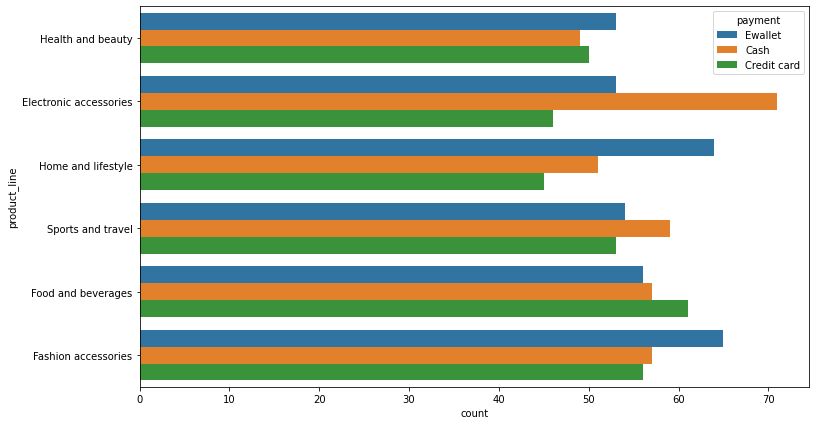

In [106]:
# What are most spreaded payment methods on each product category

plt.figure(figsize=(12,7))
sns.countplot(y ='product_line', hue = "payment", data = df) 